# W11 F Activity: Data Ink and Axis Manipulation

DS 2023 | Communicating with Data

In this notebook, we create plots that demonstrate the principles of data ink and axis manipulation.

The main idea is to learn how to play with these design dimensions using Matplotlib and Seaborn. 

We will work with a data set of baseball statistics from 1871 to 2012.

# Set Up

## Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")

## Read in the Data

In [34]:
df = pd.read_csv("mlbpitching.csv")
df = df.set_index('year')
df = df.drop(columns='id')

In [35]:
df.head()

,teams,total_pitchers,average_age,runs_per_game,ERA,games_played,games_finished,complete_game,shutouts,shutouts_team,...,wild_pitches,batters_faced,WHIP,BA_bip,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk,errors
year,,,,,,,,,,,,,,,,,,,,,
2021,30,909,28.7,4.53,4.26,4858,4808,50,29,299,...,1862,181818,1.297,0.292,8.3,1.3,3.3,8.9,2.67,2626
2020,30,735,28.3,4.65,4.44,1796,1767,29,12,99,...,675,66506,1.327,0.292,8.4,1.3,3.5,9.1,2.56,1037
2019,30,831,28.4,4.83,4.49,4858,4813,45,26,268,...,1788,186517,1.334,0.298,8.7,1.4,3.3,8.9,2.69,2898
2018,30,799,28.4,4.45,4.14,4862,4820,42,19,312,...,1847,185139,1.304,0.296,8.5,1.2,3.2,8.5,2.63,2792
2017,30,755,28.5,4.65,4.35,4860,4801,59,27,261,...,1810,185295,1.342,0.300,8.8,1.3,3.3,8.3,2.53,2817


In [36]:
df["year"] = df.index
df.columns

Index(['teams', 'total_pitchers', 'average_age', 'runs_per_game', 'ERA',
       'games_played', 'games_finished', 'complete_game', 'shutouts',
       'shutouts_team', 'saves', 'innings_pitched', 'hits', 'runs',
       'earned_runs', 'home_runs', 'walks', 'intentional_walks', 'strikeouts',
       'hit_batter', 'balks', 'wild_pitches', 'batters_faced', 'WHIP',
       'BA_bip', 'hits_9', 'homeruns_9', 'walks_9', 'strikeouts_9',
       'strikeout_walk', 'errors', 'year'],
      dtype='object')

In [37]:
df.dtypes

teams                  int64
total_pitchers         int64
average_age          float64
runs_per_game        float64
ERA                  float64
games_played           int64
games_finished         int64
complete_game          int64
shutouts               int64
shutouts_team          int64
saves                  int64
innings_pitched      float64
hits                   int64
runs                   int64
earned_runs            int64
home_runs              int64
walks                  int64
intentional_walks    float64
strikeouts             int64
hit_batter           float64
balks                  int64
wild_pitches           int64
batters_faced          int64
WHIP                 float64
BA_bip               float64
hits_9               float64
homeruns_9           float64
walks_9              float64
strikeouts_9         float64
strikeout_walk       float64
errors                 int64
year                   int64
dtype: object

# Challenges

# Challenge 1: Axis Manipulation

Create a line plot of `total_pitchers` using Seaborn's `relplot`.

Set the aspect to $1.5$.

You will notice a dip between the years 1940 and 1960.

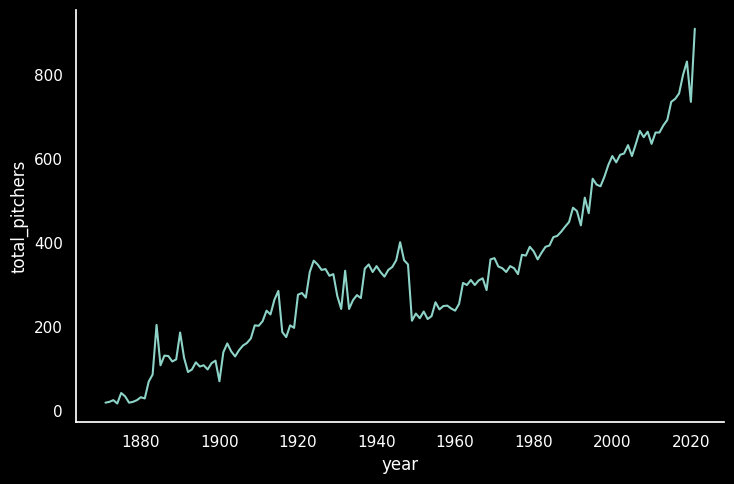

In [38]:
sns.relplot(data=df, x="year", y="total_pitchers", aspect=1.5, kind="line")

Try to get a better sense visually of where the dip begins and ends by adding vertical lines to the plot.

You can do this by calling `g.ax.grid(axis='x')`.

Note that you can make these lines lighter by setting the alpha to something like $.3$.

The variable `g` is the object returned by `sns.relplot()`.

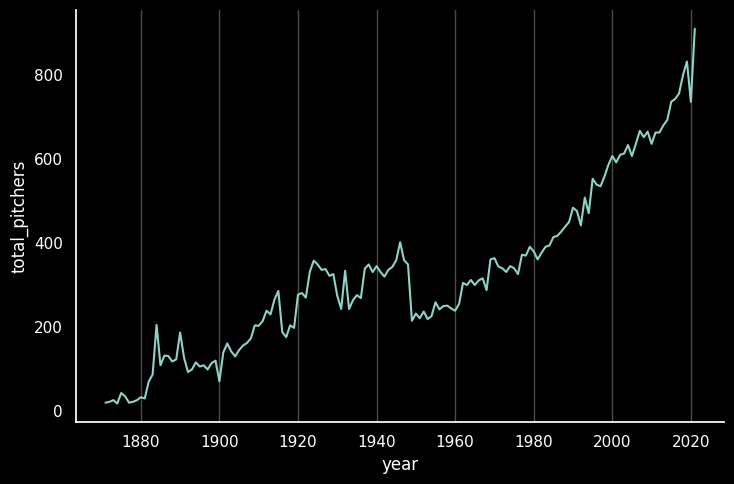

In [39]:
g = sns.relplot(data=df, x="year", y="total_pitchers", aspect=1.5, kind="line")
g.ax.grid(axis="x", alpha=0.3)

Create a data frame `X` that selects only rows between the beginning and end years of the dip.

In [66]:
X = df[df["year"].between(1938, 1950)]

Then use the same plot function and parameters to visualize `X`.

This time, show all the years on the x-axis by adding the following line:

`g.ax.set_xticks(X.index.to_list())`

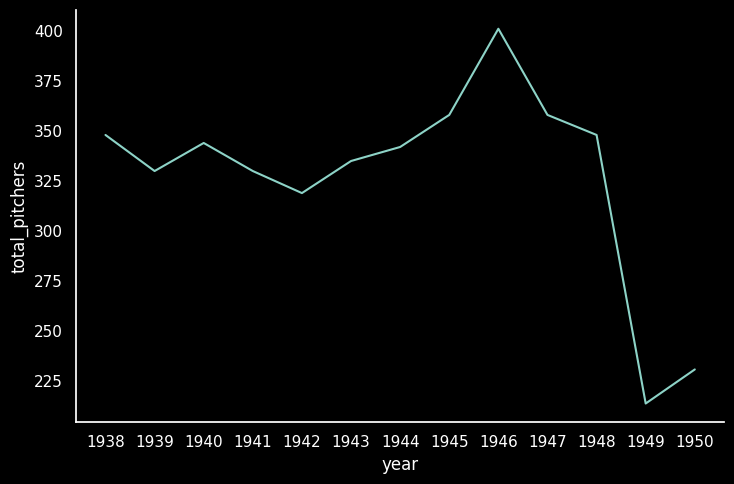

In [67]:
g = sns.relplot(data=X, x="year", y="total_pitchers", aspect=1.5, kind="line")
g.ax.set_xticks(X.index.to_list())
g

Now show the same data frame as a bar plot using Seaborn's `catplot`.

Set the aspect to $1.5$.

Do not make any modifications to the axes object.

What difference do you see in the default behavior between the bar and line plots?

> **Answer**: The y axis **limits** are different.

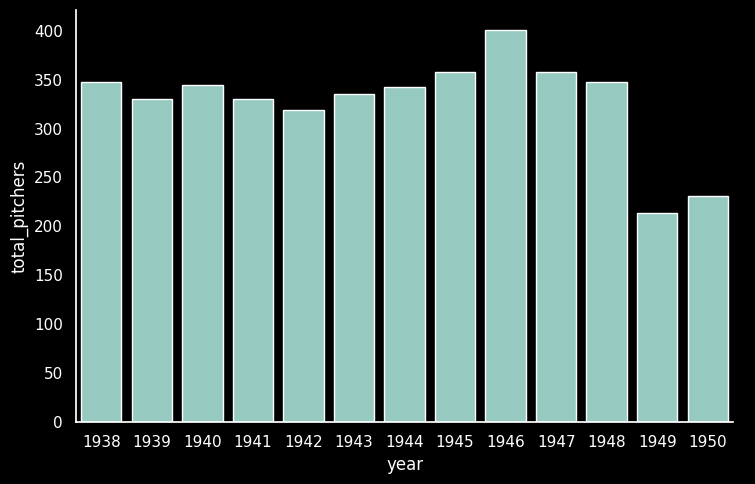

In [69]:
sns.catplot(data=X, x="year", y="total_pitchers", aspect=1.5, kind="bar")

Now let's redo the line plot so that it has the same y-axis as the bar plot.

You can do this with `g.ax.set_ylim(bottom=0)`

Keep all the axes modifications you made to your earlier line plot.

Also add horizontal grid lines.

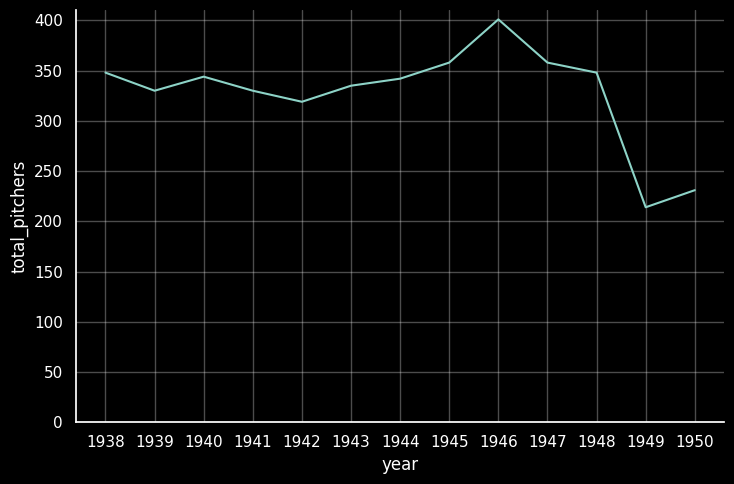

In [72]:
g = sns.relplot(data=X, x="year", y="total_pitchers", aspect=1.5, kind="line")
g.ax.set_xticks(X.index.to_list())
g.ax.grid(axis="y", alpha=0.3)
g.ax.grid(axis="x", alpha=0.3)
g.ax.set_ylim(bottom=0)
g

# Challenge 2: Data/Ink Ratio

In [75]:
def clean(plt, ax):
    sns.despine(ax=ax, left=True, bottom=True)
    ax.set(xlabel=None, ylabel=None)
    ax.tick_params(
        axis='both',
        which='both',
        left=False,
        bottom=False,
        labelbottom=False,
        labelleft=False
    )
    plt

In the spirit of increasing the data-to-ink ratio of the plot, remove the following:

- x and y axis labels
- all spines
- tick marks 

Also, set the title to "Total Pitches by Year".

Create a function that creates similarly "clean" line plots.

Apply it to another feature, e.g. `wild_pitches`.

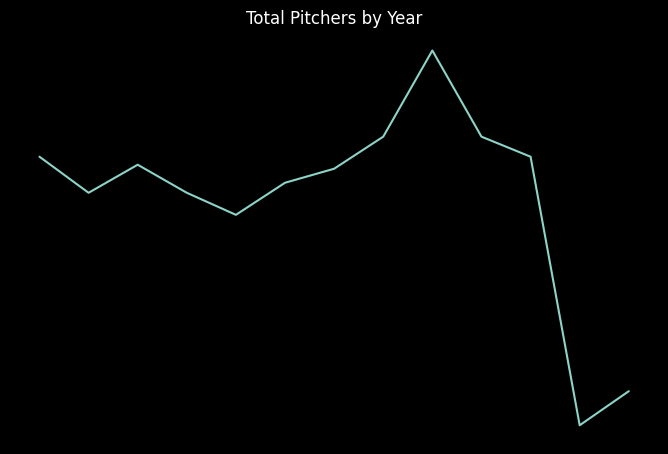

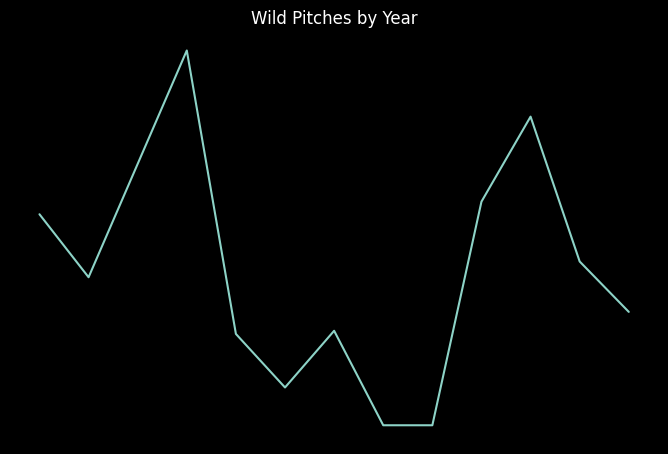

In [78]:
g = sns.relplot(data=X, x="year", y="total_pitchers", kind="line", aspect=1.5)
g.ax.set_title("Total Pitchers by Year")
clean(g, g.ax)
g = sns.relplot(data=X, x="year", y="wild_pitches", kind="line", aspect=1.5)
g.ax.set_title("Wild Pitches by Year")
clean(g, g.ax)

# Challenge 3: Sparklines

It would be nice to see all the trends at once without getting bogged down in the numbers.

One way to compare a bunch of trends at once it with sparklines.

Here is a short [article on the topic](https://www.edwardtufte.com/notebook/sparkline-theory-and-practice-edward-tufte/) by Tufte. Below is an example from the essay:

<img src="https://s3.amazonaws.com/edwardtufte.com/sparkline_twitter.png" style="width:90%;">

Use Pandas' `.plot()` with `subplots=True` on `df` to create this effect.

Set `figsize=(5, len(df.columns))` and turn of the legend.

This will create a list of line plots.

To achieve the sparkline effect, do the following:

- Remove as much non-data-ink as possible, including labels, spines, and ticks.

- Keep the y axis label and make it bold and large.

Play around with other parameters to get the effect you want.

Your result should look something like this:

<img src="short-sparklines-example.png" />

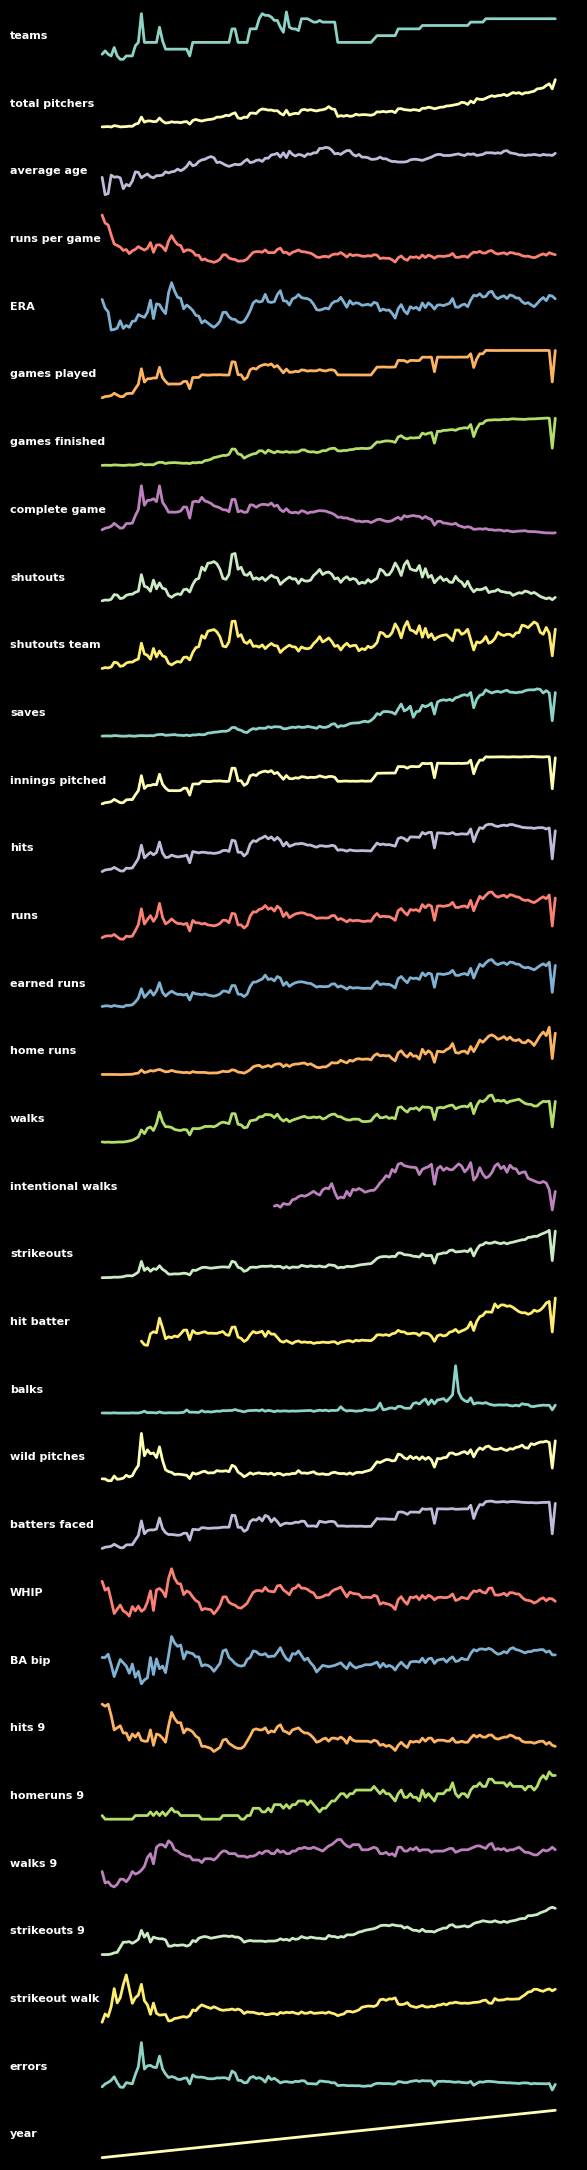

In [82]:
plot_result = df.plot(
    figsize=(5, num_cols * 0.7),
    subplots=True, legend=False,
    layout=(num_cols, 1), sharex=True, lw=2
)

if isinstance(plot_result, tuple):
    fig, axes_array = plot_result
else:
    axes_array = plot_result
    fig = axes_array.flat[0].figure

axes = axes_array.flatten()

for i, ax in enumerate(axes):
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(
        axis='both', which='both',
        left=False, bottom=False,
        labelleft=False, labelbottom=False
    )
    ax.set_xlabel(None)
    col_name = df.columns[i]
    ax.set_ylabel(
        col_name.replace("_", " "),
        rotation=0, fontsize=8,
        fontweight='bold', ha='left',
        va='center', labelpad=50,
    )

fig.subplots_adjust(left=0.2)
fig.tight_layout()
fig.subplots_adjust(left=0.001, hspace=0.3, right=0.998, top=0.98, bottom=0.02)
plt.show()

# Participation

Submit a PDF of this notebook as your participation.